In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
#for machine learning

from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn import metrics

In [5]:
from sklearn.metrics import classification_report

In [67]:
claim=pd.read_csv("D:Data Science/Data/claimants.csv")

In [68]:
claim

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


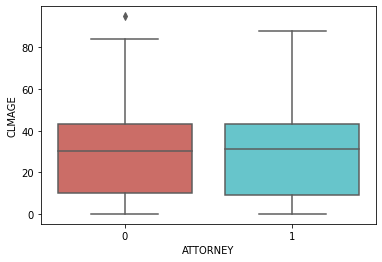

In [69]:
sns.boxplot(x="ATTORNEY",y="CLMAGE", data=claim,palette="hls")

In [70]:
claim.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [75]:
claim.drop(["CASENUM"],inplace=True,axis = 1)

KeyError: "['CASENUM'] not found in axis"

In [76]:
claim

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [72]:
claim.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


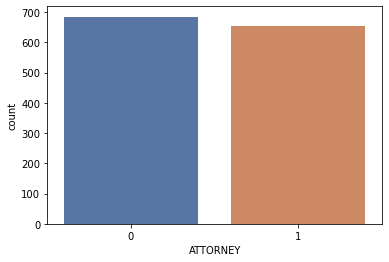

In [73]:
# Pallete
sns.countplot(x='ATTORNEY',data=claim, palette='deep')

In [85]:
pd.crosstab(claim.ATTORNEY,claim.CLMINSUR)

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


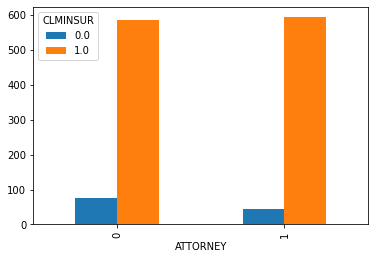

In [86]:
pd.crosstab(claim.ATTORNEY,claim.CLMINSUR).plot(kind='bar')

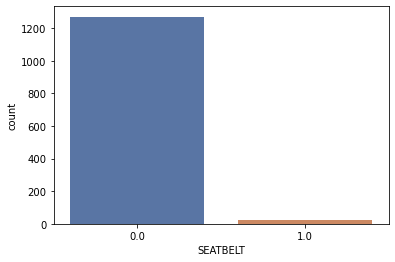

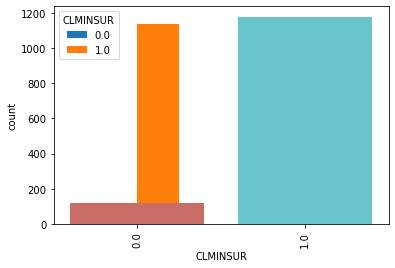

In [87]:
sns.countplot(x='SEATBELT',data=claim, palette='deep')
pd.crosstab(claim.SEATBELT,claim.CLMINSUR).plot(kind="bar")
sns.countplot(x="CLMINSUR",data=claim,palette="hls")

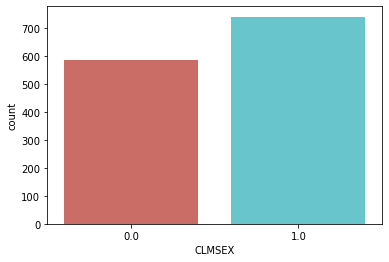

In [43]:
sns.countplot(x="CLMSEX",data=claim,palette="hls")

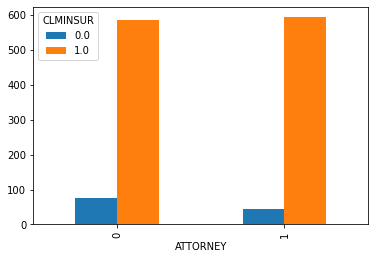

In [81]:
pd.crosstab(claim.ATTORNEY,claim.CLMINSUR).plot(kind="bar")

In [88]:
claim.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

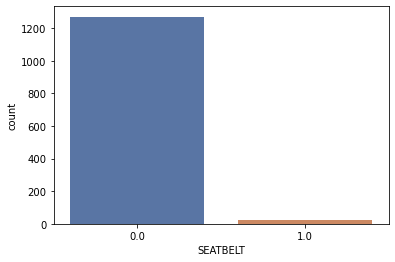

In [89]:
sns.countplot(x='SEATBELT', data=claim, palette='deep')

In [92]:
claim["CLMSEX"].fillna(1,inplace=True) #claimants.CLMSEX.mode() = 1



In [93]:
claim["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1



In [94]:

claim["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0

In [90]:
claim.CLMSEX.mode()
claim.CLMINSUR.mode()
claim.SEATBELT.mode()
claim.CLMAGE.mean()


28.414422241529106

In [96]:
claim.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4

In [97]:
claim.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [98]:
# Model building 
claim.shape

(1340, 6)

In [103]:
x = claim.iloc[:,[1,2,3,4,5]]
x

In [106]:
y = claim.iloc[:,0]
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [108]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [109]:
classifier.coef_

array([[ 0.31711334,  0.5055713 , -0.52814335,  0.0066041 , -0.3224325 ]])

In [110]:
classifier.predict_proba (x) # probability values

array([[9.99974075e-01, 2.59253820e-05],
       [4.95386951e-01, 5.04613049e-01],
       [4.25082812e-01, 5.74917188e-01],
       ...,
       [2.85349951e-01, 7.14650049e-01],
       [6.86685509e-01, 3.13314491e-01],
       [3.38781941e-01, 6.61218059e-01]])

In [114]:
y_pred=classifier.predict(x)
claim['y_pred']=y_pred
claim

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0000,34.940,0
1,1,1.0,0.0,0.0,18.0000,0.891,1
2,1,0.0,1.0,0.0,5.0000,0.330,1
3,0,0.0,1.0,1.0,31.0000,0.037,1
4,1,0.0,1.0,0.0,30.0000,0.038,1
...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1
1336,0,1.0,1.0,0.0,46.0000,3.705,0
1337,1,1.0,1.0,0.0,39.0000,0.099,1
1338,0,1.0,0.0,0.0,8.0000,3.177,0


In [116]:
y_prob=pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
new_df=pd.concat([claim,y_prob],axis=1)
new_df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.0000,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.0000,0.891,1,0.495387,0.504613
2,1,0.0,1.0,0.0,5.0000,0.330,1,0.425083,0.574917
3,0,0.0,1.0,1.0,31.0000,0.037,1,0.490007,0.509993
4,1,0.0,1.0,0.0,30.0000,0.038,1,0.363271,0.636729
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1,0.406789,0.593211
1336,0,1.0,1.0,0.0,46.0000,3.705,0,0.549435,0.450565
1337,1,1.0,1.0,0.0,39.0000,0.099,1,0.285350,0.714650
1338,0,1.0,0.0,0.0,8.0000,3.177,0,0.686686,0.313314


In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[435 250]
 [147 508]]


In [123]:
pd.crosstab(y_pred,y)

ATTORNEY,0,1
row_0,,
0,435,147
1,250,508


In [ ]:
pd.crosstab(y_pred,y).plot(kind='bar')

In [126]:
claim

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0000,34.940,0
1,1,1.0,0.0,0.0,18.0000,0.891,1
2,1,0.0,1.0,0.0,5.0000,0.330,1
3,0,0.0,1.0,1.0,31.0000,0.037,1
4,1,0.0,1.0,0.0,30.0000,0.038,1
...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1
1336,0,1.0,1.0,0.0,46.0000,3.705,0
1337,1,1.0,1.0,0.0,39.0000,0.099,1
1338,0,1.0,0.0,0.0,8.0000,3.177,0


In [130]:
accuracy=sum(y==y_pred)/claim.shape[0]
accuracy

0.7037313432835821

In [131]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [136]:
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score

0.7053045077171672

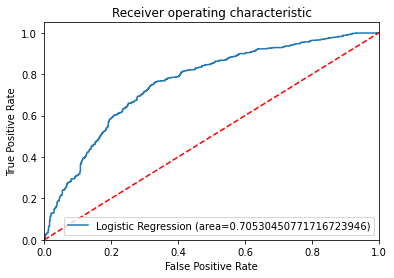

In [137]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,-1]) 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.20f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [138]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,-1])

In [139]:
y_prob1

,0
0,0.000026
1,0.504613
2,0.574917
3,0.509993
4,0.636729
...,...
1335,0.593211
1336,0.450565
1337,0.714650
1338,0.313314


In [142]:
logit = sm.Logit(y, x) 


In [143]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.609294
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                            4
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.1207
Time:                        12:30:12   Log-Likelihood:                -816.45
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 2.515e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.3005      0.116      2.591      0.010       0.073       0.528
CLMINSUR       0.4167      0.124      3.364      0.001       0.174       0.660
SEATBELT      -0.6828      0.522     -1.308      0.191      -1.706       0.341
CLMAGE         0.0059      0.003      1.951      0.051   -2.58e-05       0.012
LOSS          -0.3262      0.029    -11.234      0.000      -0.383      -0.269
==============================================================================
"""

In [144]:
fpr

array([0.        , 0.        , 0.        , 0.00145985, 0.00145985,
       0.00291971, 0.00291971, 0.00437956, 0.00437956, 0.00583942,
       0.00583942, 0.00729927, 0.00729927, 0.00875912, 0.00875912,
       0.01021898, 0.01021898, 0.01167883, 0.01167883, 0.01313869,
       0.01313869, 0.01459854, 0.01459854, 0.01605839, 0.01605839,
       0.01605839, 0.01605839, 0.01605839, 0.01605839, 0.01751825,
       0.01751825, 0.01751825, 0.01751825, 0.0189781 , 0.0189781 ,
       0.02043796, 0.02043796, 0.02189781, 0.02189781, 0.02481752,
       0.02481752, 0.02919708, 0.02919708, 0.03065693, 0.03065693,
       0.03357664, 0.03357664, 0.03357664, 0.0350365 , 0.0350365 ,
       0.03649635, 0.03649635, 0.0379562 , 0.0379562 , 0.03941606,
       0.03941606, 0.04379562, 0.04379562, 0.04525547, 0.04525547,
       0.04671533, 0.04671533, 0.04817518, 0.04817518, 0.04963504,
       0.04963504, 0.05109489, 0.05109489, 0.0540146 , 0.0540146 ,
       0.0540146 , 0.0540146 , 0.05547445, 0.05547445, 0.05839

In [145]:
tpr

array([0.        , 0.00152672, 0.00305344, 0.00305344, 0.00763359,
       0.00763359, 0.01984733, 0.01984733, 0.02442748, 0.02442748,
       0.02900763, 0.02900763, 0.03053435, 0.03053435, 0.03206107,
       0.03206107, 0.0351145 , 0.0351145 , 0.04580153, 0.04580153,
       0.06412214, 0.06412214, 0.06564885, 0.06564885, 0.06870229,
       0.07480916, 0.0870229 , 0.09007634, 0.09312977, 0.09312977,
       0.09618321, 0.10076336, 0.10992366, 0.10992366, 0.11603053,
       0.11603053, 0.12671756, 0.12671756, 0.12824427, 0.12824427,
       0.12977099, 0.12977099, 0.14656489, 0.14656489, 0.15114504,
       0.15114504, 0.15267176, 0.15572519, 0.15572519, 0.16030534,
       0.16030534, 0.16183206, 0.16335878, 0.17709924, 0.17709924,
       0.18625954, 0.18625954, 0.19083969, 0.19083969, 0.20152672,
       0.20152672, 0.20763359, 0.20916031, 0.21221374, 0.21221374,
       0.21374046, 0.21374046, 0.21679389, 0.21679389, 0.2259542 ,
       0.23206107, 0.23816794, 0.23816794, 0.23969466, 0.23969